In [5]:
#load the data
import pandas as pd
data = pd.read_csv('USA_Housing.csv')

In [6]:
import sklearn
import numpy as np
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


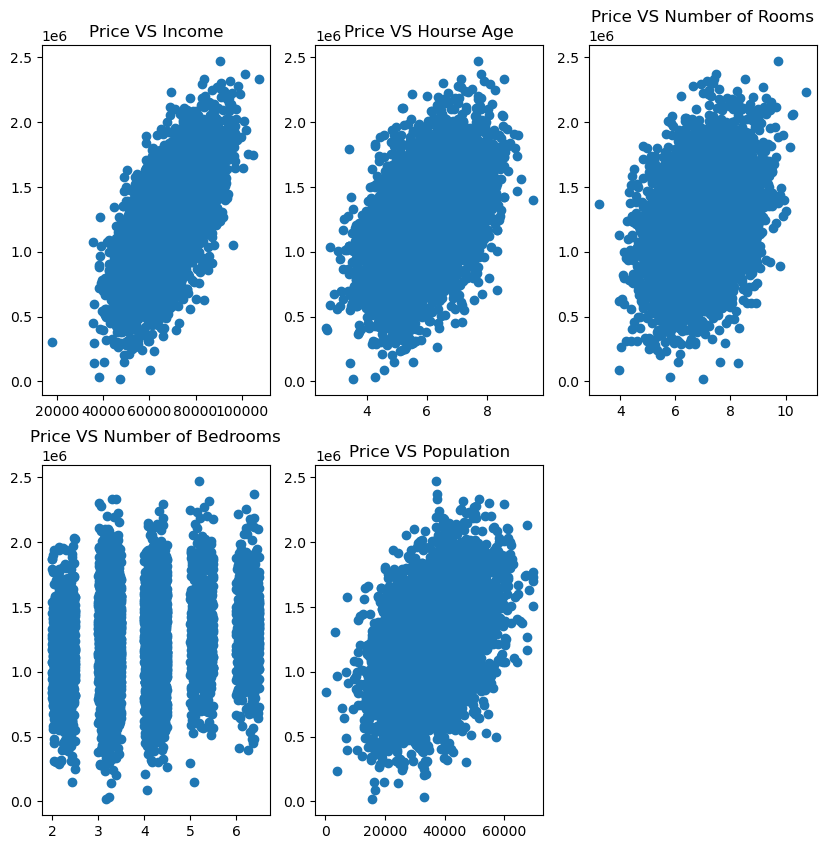

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS Hourse Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:,'Avg. Area Number of Bedrooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Bedrooms')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Population')
plt.show()

In [13]:
#define X and Y
X = data.loc[:,'Avg. Area Income']
Y = data.loc[:,'Price']
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [16]:
X = np.array(X).reshape(-1,1)
print(X.shape)

(5000, 1)


In [17]:
#set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#train the model
LR1.fit(X,Y)

LinearRegression()

In [19]:
#calculate the price vs income
Y_predict_1 = LR1.predict(X)
print(Y_predict_1)

[1464424.9504096  1458133.78934377 1077429.52283635 ... 1122016.75893299
 1219741.59365632 1166948.95599714]


In [20]:
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(Y,Y_predict_1)
r2_score_1 = r2_score(Y,Y_predict_1)
print(mean_squared_error_1,r2_score_1)

73645940735.18944 0.4092593070338846


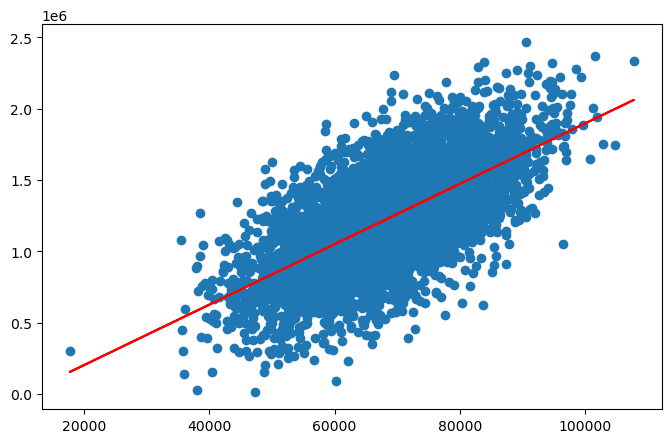

In [21]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,Y)
plt.plot(X,Y_predict_1,'r')
plt.show()

In [24]:
#define X_multi
X_multi = data.drop(['Price','Address'],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [25]:
#set up 2nd linear model
LR_multi = LinearRegression()
#train the model
LR_multi.fit(X_multi,Y)

LinearRegression()

In [27]:
#make prediction
Y_predict_multi = LR_multi.predict(X_multi)
print(Y_predict_multi)

[1223847.04275361 1494937.69161727 1253016.74608149 ... 1020482.52609274
 1263982.8245736  1301976.34571977]


In [28]:
mean_squared_error_multi = mean_squared_error(Y,Y_predict_multi)
r2_score_multi = r2_score(Y,Y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219734313.253004 0.9180238195089554


In [29]:
print(mean_squared_error_1)

73645940735.18944


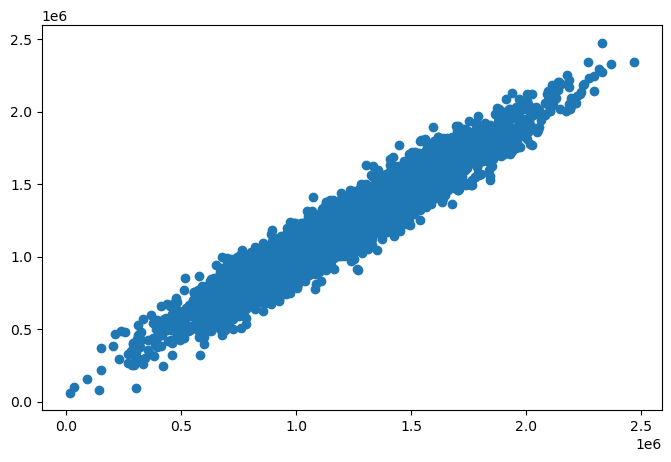

In [31]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(Y,Y_predict_multi)
plt.show()

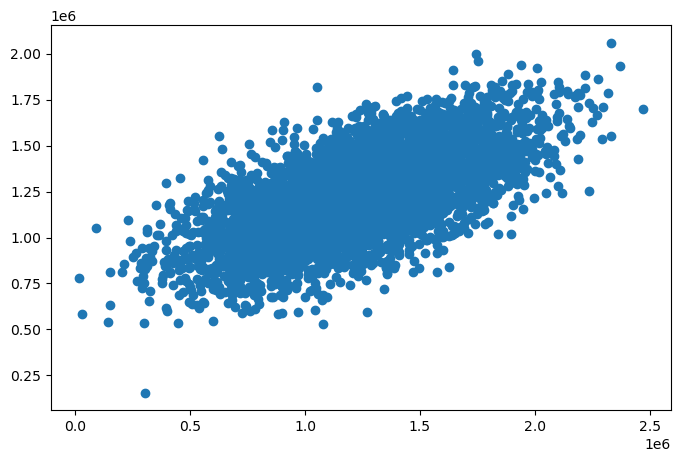

In [32]:
fig8 = plt.figure(figsize=(8,5))
plt.scatter(Y,Y_predict_1)
plt.show()

In [34]:
X_test = [65000,5,5,4,30000]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

[[65000     5     5     4 30000]]


In [37]:
Y_test_predict = LR_multi.predict(X_test)
print(Y_test_predict)

[659385.93352863]


C:\Data\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
